In [ ]:
ans = []
for i in range(int(input())):
  a = int(input())
  ans.append(a)
ans.sort()
for i in ans:
  print(i)

In [ ]:
from keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=1000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape, test_data.shape)
print(max([max(x) for x in train_data]))

(25000,) (25000,)
999


In [ ]:
word_index = imdb.get_word_index()
rev_word_index = dict([(val, key) for (key, val) in word_index.items()])
decode_review = ' '.join(rev_word_index.get(i-3, '?') for i in train_data[0])

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_seq(seq, dim=1000):
  results = np.zeros((len(seq), dim))
  for i, sequence in enumerate(seq):
    results[i, sequence] = 1.
  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.array(train_label).astype('float32')
y_test = np.array(train_label).astype('float32')
print(y_train.dtype, y_test.dtype)

float32 float32


In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_crossentropy])

In [ ]:
x_val = x_train[:1000]
p_x_train = x_train[1000:]
y_val = y_train[:1000]
p_y_train = y_train[1000:]

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=['acc'])
history = model.fit(p_x_train, p_y_train, epochs=20, batch_size=50, validation_data=(x_val, y_val), verbose=0)

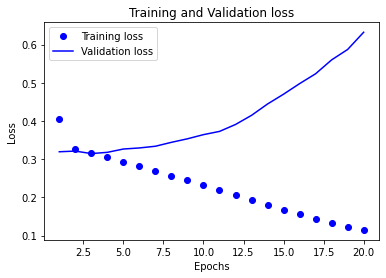

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

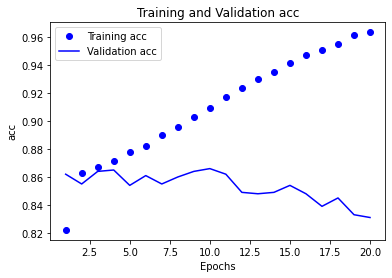

In [ ]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=50)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
500/500 [==============================] - 4s 4ms/step - loss: 0.3885 - accuracy: 0.8318
Epoch 2/4
500/500 [==============================] - 2s 3ms/step - loss: 0.3160 - accuracy: 0.8660
Epoch 3/4
500/500 [==============================] - 2s 3ms/step - loss: 0.2882 - accuracy: 0.8805
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 1.8750 - accuracy: 0.4996


[1.8750089406967163, 0.49955999851226807]

In [ ]:
model.predict(x_test)

array([[0.256011  ],
       [0.99854815],
       [0.733443  ],
       ...,
       [0.09076443],
       [0.02604386],
       [0.64588135]], dtype=float32)

In [ ]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

In [ ]:
len(train_data), len(test_data)

(8982, 2246)

In [ ]:
import numpy as np

def vectorize_seq(seq, dim=10000):
  results = np.zeros((len(seq), dim))
  for i, sequence in enumerate(seq):
    results[i, sequence] = 1.
  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

def onehot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, seq in labels:
    results[i, seq] = 1.
  return results

In [ ]:
from keras import layers
from keras import models
from keras.utils.np_utils import to_categorical

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
p_x_train = x_train[1000:]
y_val = to_categorical(train_label)[:1000]
p_y_train = to_categorical(train_label)[1000:]

In [ ]:
history = model.fit(p_x_train, p_y_train, epochs=20, verbose=0, batch_size=512, validation_data=(x_val, y_val))

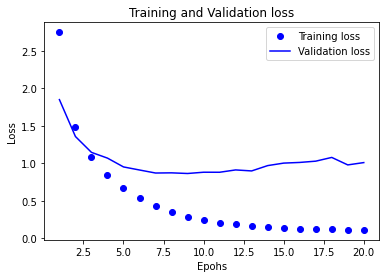

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.legend()

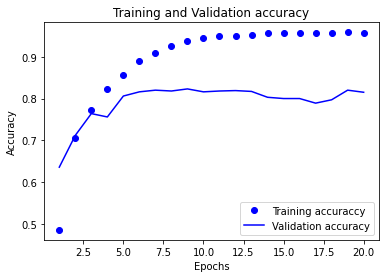

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuraccy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
from keras.datasets import boston_housing

(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [5]:
# train_data.shape, train_target.shape
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [14]:
mean_data = train_data.mean(axis=0)
train_data -= mean_data
std_data = train_data.std(axis=0)
train_data /= std_data

test_data -= mean_data
test_data /= std_data

In [17]:
from keras import layers
from keras import models

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
  return model

In [10]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_score = []

for i in range(k):
  print('처리중인 폴드', i)
  val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
  val_targets = train_target[i * num_val_samples:(i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
  partial_train_target = np.concatenate([train_target[:i * num_val_samples], train_target[(i+1) * num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_target, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_score.append(val_mae)

처리중인 폴드 0
처리중인 폴드 1
처리중인 폴드 2
처리중인 폴드 3


In [11]:
np.mean(all_score)

2.485802859067917

In [21]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_score = []

for i in range(k):
  print('처리중인 폴드', i)
  val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
  val_targets = train_target[i * num_val_samples:(i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
  partial_train_target = np.concatenate([train_target[:i * num_val_samples], train_target[(i+1) * num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_target, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_score.append(mae_history)

처리중인 폴드 0
처리중인 폴드 1
처리중인 폴드 2
처리중인 폴드 3


Text(0, 0.5, 'Validation_mae')

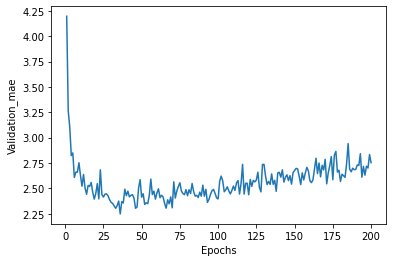

In [25]:
average_mae_history = [np.mean([x[i] for x in all_score]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation_mae')

Text(0, 0.5, 'Validataion mae')

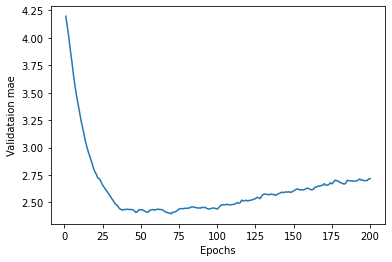

In [26]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history)

plt.clf()
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validataion mae')

In [42]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)             

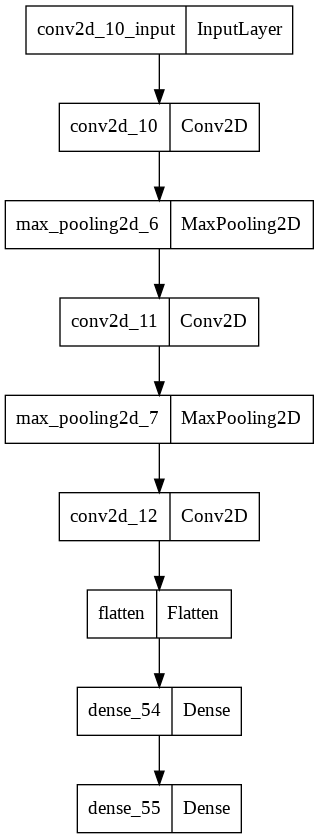

In [43]:
import tensorflow as tf

tf.keras.utils.plot_model(model)

In [63]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [64]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 56s 58ms/step - loss: 0.1695 - accuracy: 0.9462
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0311 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0198 - accuracy: 0.9940


In [65]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0260 - accuracy: 0.9915


(0.025953158736228943, 0.9915000200271606)